In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('addedcolumns.csv')
data['spread'] = data.iloc[:,0] -data.iloc[:,2]
data = data.loc[data['spread']>0]

data = data.drop('spread', axis = 1)
data['timestamp'] = pd.to_numeric(data['timestamp'], errors='coerce')

#data = data.sort_values('timestamp')

data = data.reset_index(drop=True)
#data = data[data['timestamp'] != 'timestamp']
Time = data.pop('timestamp')

Date_Time = Time
Date_Time = pd.to_numeric(Date_Time, errors='coerce')
Date_Time = pd.to_datetime(Date_Time, unit = 'ms')

#Time = pd.to_numeric(Time, errors='coerce')

col = list(data)

col1 = col[0:40]
col1 = col1[:20]

for i in col:
    data[i] = pd.to_numeric(data[i], errors='coerce')

df = data
df_slope = pd.DataFrame(columns=col1)

df['mid_p_Y'] = (df['BINANCE_BTC-USDT_ask_1'] + df['BINANCE_BTC-USDT_bid_1']) / 2

Prev = []
slope = []
Ret = []

Past_ticks = 800
Fut_ticks = 100

"""
for i in range(Past_ticks, len(data)):
    Prev.append(df['mid_p_Y'][i-Past_ticks : i])"""

for i in range(Past_ticks, len(data)):
    up = i + Fut_ticks
    if up > (len(data)-1):
        break
    rr = (df['mid_p_Y'][up] / df['mid_p_Y'][i]) - 1
    Ret.append(rr)

Prev, Ret = np.array(Prev), np.array(Ret)

for var in col1:
    for i in range(Past_ticks, len(data)):
        time = Time[i]-Time[i-Past_ticks]
        #time = 1
        slope.append((data[var][i] - data[var][i-Past_ticks]) / time) 
    df_slope[var] = slope
    slope = []

df_slope.columns = [str(col1_) + '_slope' for col1_ in df_slope.columns]

#------------------------------------------------------------------------------

df['b_a_spread'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_bid_1']

df['b12'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_2']
df['b13'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_3']
df['b14'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_4']
df['b15'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_5']
#df['b16'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_6']
#df['b17'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_7']
#df['b18'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_8']
#df['b19'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_9']
#df['b1ten'] = df['BINANCE_BTC-USDT_bid_1'] - df['BINANCE_BTC-USDT_bid_10']

df['aten1'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_2']
df['aten2'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_3']
df['aten3'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_4']
df['aten4'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_5']
#df['aten5'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_6']
#df['aten6'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_7']
#df['aten7'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_8']
#df['aten8'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_9']
#df['aten9'] = df['BINANCE_BTC-USDT_ask_1'] - df['BINANCE_BTC-USDT_ask_10']


Total_P_ask = df['BINANCE_BTC-USDT_ask_1']+df['BINANCE_BTC-USDT_ask_10']+df['BINANCE_BTC-USDT_ask_2']+df['BINANCE_BTC-USDT_ask_3']+df['BINANCE_BTC-USDT_ask_4']+df['BINANCE_BTC-USDT_ask_5']+df['BINANCE_BTC-USDT_ask_6']+df['BINANCE_BTC-USDT_ask_7']+df['BINANCE_BTC-USDT_ask_8']+df['BINANCE_BTC-USDT_ask_9']
Total_P_bid = df['BINANCE_BTC-USDT_bid_1']+df['BINANCE_BTC-USDT_bid_10']+df['BINANCE_BTC-USDT_bid_2']+df['BINANCE_BTC-USDT_bid_3']+df['BINANCE_BTC-USDT_bid_4']+df['BINANCE_BTC-USDT_bid_5']+df['BINANCE_BTC-USDT_bid_6']+df['BINANCE_BTC-USDT_bid_7']+df['BINANCE_BTC-USDT_bid_8']+df['BINANCE_BTC-USDT_bid_9']

Total_V_ask = df['BINANCE_BTC-USDT_askq_1']+df['BINANCE_BTC-USDT_askq_10']+df['BINANCE_BTC-USDT_askq_2']+df['BINANCE_BTC-USDT_askq_3']+df['BINANCE_BTC-USDT_askq_4']+df['BINANCE_BTC-USDT_askq_5']+df['BINANCE_BTC-USDT_askq_6']+df['BINANCE_BTC-USDT_askq_7']+df['BINANCE_BTC-USDT_askq_8']+df['BINANCE_BTC-USDT_askq_9']
Total_V_bid = df['BINANCE_BTC-USDT_bidq_1']+df['BINANCE_BTC-USDT_bidq_10']+df['BINANCE_BTC-USDT_bidq_2']+df['BINANCE_BTC-USDT_bidq_3']+df['BINANCE_BTC-USDT_bidq_4']+df['BINANCE_BTC-USDT_bidq_5']+df['BINANCE_BTC-USDT_bidq_6']+df['BINANCE_BTC-USDT_bidq_7']+df['BINANCE_BTC-USDT_bidq_8']+df['BINANCE_BTC-USDT_bidq_9']

df['acc_diff_P'] = Total_P_ask - Total_P_bid
df['acc_diff_v'] = Total_V_ask - Total_V_bid
df['mean_P_ask'] = Total_P_ask / 10
df['mean_P_bid'] = Total_P_bid / 10
df['mean_V_ask'] = Total_V_ask / 10
df['mean_V_bid'] = Total_V_bid / 10


df = df[Past_ticks: -Fut_ticks]
df_slope = df_slope[: -Fut_ticks]
#Prev = Prev[:-Fut_ticks, :]

qw = list(df)


AR_ = df.iloc[:, 40:].values

#df_ar = np.concatenate((AR, AR_), axis = 1)

df_cat_dfslope = np.concatenate((AR_, df_slope.values), axis = 1)
Feature = df_cat_dfslope

In [6]:
column = list(df)[40:]

In [18]:
dx = pd.DataFrame(AR_, columns=column, dtype=None, copy=False)

In [19]:
Feat_DF = pd.concat((dx, df_slope), axis = 1)

In [21]:
Feat_DF.head()

,New_Sell_Orders_No,Sum_Sell_Order_Prices,Total_Qty_Sell_Orders,New_Buy_Orders_No,Sum_Buy_Order_Prices,Total_Qty_Buy_Orders,Sell_Orders_No_Cancelled,Sum_Sell_Order_Prices_Cancelled,Total_Qty_Sell_Orders_Cancelled,Buy_Orders_No_Cancelled,...,BINANCE_BTC-USDT_bid_3_slope,BINANCE_BTC-USDT_bidq_3_slope,BINANCE_BTC-USDT_ask_4_slope,BINANCE_BTC-USDT_askq_4_slope,BINANCE_BTC-USDT_bid_4_slope,BINANCE_BTC-USDT_bidq_4_slope,BINANCE_BTC-USDT_ask_5_slope,BINANCE_BTC-USDT_askq_5_slope,BINANCE_BTC-USDT_bid_5_slope,BINANCE_BTC-USDT_bidq_5_slope
0,90.0,9368150.0,40922.0,23.0,2364100.0,4985.0,25.0,2623755.0,19952.0,23.0,...,-0.000545,-0.000038,0.000272,-0.005733,-0.000481,0.000001,0.000301,-0.003589,-0.000458,0.000012
1,90.0,9368150.0,40922.0,23.0,2364100.0,4985.0,25.0,2623755.0,19952.0,23.0,...,-0.000758,-0.000053,0.000379,-0.007978,-0.000669,0.000002,0.000419,-0.004995,-0.000637,0.000016
2,90.0,9368150.0,40922.0,23.0,2364100.0,4985.0,25.0,2623755.0,19952.0,23.0,...,-0.000862,-0.000061,0.000431,-0.009074,-0.000761,0.000002,0.000477,-0.005681,-0.000725,0.000018
3,90.0,9368150.0,40922.0,22.0,2263205.0,4022.0,25.0,2623755.0,19952.0,22.0,...,-0.000870,-0.000061,0.000435,-0.009161,-0.000768,0.000002,0.000481,-0.005735,-0.000731,0.000019
4,90.0,9368150.0,40922.0,22.0,2263205.0,4022.0,25.0,2623755.0,19952.0,22.0,...,-0.000879,-0.000062,0.000440,-0.009255,-0.000776,0.000002,0.000486,-0.005794,-0.000739,0.000019


In [30]:
S = list(Feat_DF)
print(len(S))

print(S)

52
['New_Sell_Orders_No', 'Sum_Sell_Order_Prices', 'Total_Qty_Sell_Orders', 'New_Buy_Orders_No', 'Sum_Buy_Order_Prices', 'Total_Qty_Buy_Orders', 'Sell_Orders_No_Cancelled', 'Sum_Sell_Order_Prices_Cancelled', 'Total_Qty_Sell_Orders_Cancelled', 'Buy_Orders_No_Cancelled', 'Sum_Buy_Order_Prices_Cancelled', 'Total_Qty_Buy_Orders_Cancelled', 'No_of_Trades', 'Trade_Price_Sum', 'Trade_Qty_Sum', 'LTP', 'mid_p_Y', 'b_a_spread', 'b12', 'b13', 'b14', 'b15', 'aten1', 'aten2', 'aten3', 'aten4', 'acc_diff_P', 'acc_diff_v', 'mean_P_ask', 'mean_P_bid', 'mean_V_ask', 'mean_V_bid', 'BINANCE_BTC-USDT_ask_1_slope', 'BINANCE_BTC-USDT_askq_1_slope', 'BINANCE_BTC-USDT_bid_1_slope', 'BINANCE_BTC-USDT_bidq_1_slope', 'BINANCE_BTC-USDT_ask_2_slope', 'BINANCE_BTC-USDT_askq_2_slope', 'BINANCE_BTC-USDT_bid_2_slope', 'BINANCE_BTC-USDT_bidq_2_slope', 'BINANCE_BTC-USDT_ask_3_slope', 'BINANCE_BTC-USDT_askq_3_slope', 'BINANCE_BTC-USDT_bid_3_slope', 'BINANCE_BTC-USDT_bidq_3_slope', 'BINANCE_BTC-USDT_ask_4_slope', 'BINANCE

In [23]:
import seaborn as sns

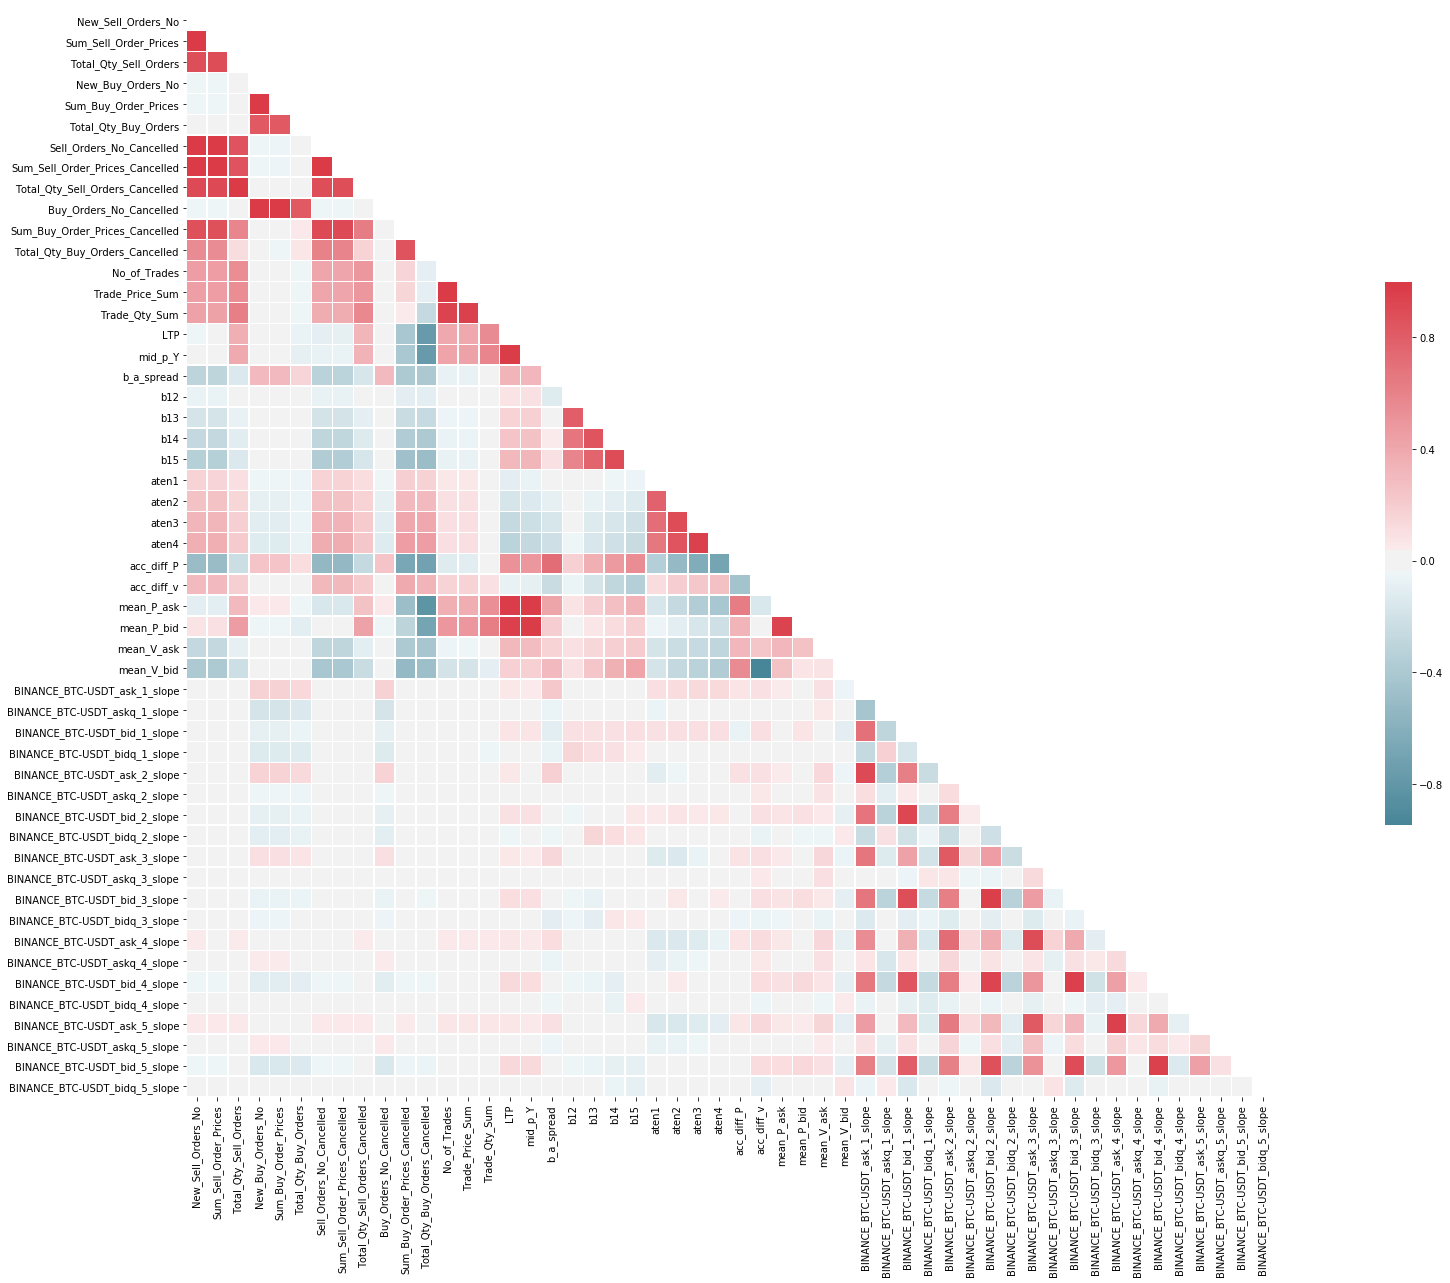

In [34]:
corr = Feat_DF.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})